# Credit Card Fraud Detection

The challenge is to recognize fraudulent credit card transactions so 
that the customers of credit card companies are not charged for items
that they did not purchase.

Main challenges involved in credit card fraud detection are:

1. Enormous Data is processed every day and the model build must
   be fast enough to respond to the scam in time.
2. Imbalanced Data i.e most of the transactions (99.8%) are not 
   fraudulent which makes it really hard for detecting the fraudulent ones
3. Data availability as the data is mostly private.
4. Misclassified Data can be another major issue, 
   as not every fraudulent transaction is caught and reported.
5. Adaptive techniques used against the model by the scammers.

How to tackle these challenges?

1. The model used must be simple and fast enough to detect the anomaly
   and classify it as a fraudulent transaction as quickly as possible.
2. Imbalance can be dealt with by properly using some methods which
   we will talk about in the next paragraph
3. For protecting the privacy of the user the dimensionality of the data can be reduced.
4. A more trustworthy source must be taken which double-check the data,
   at least for training the model.
5. We can make the model simple and interpretable so that when the scammer
   adapts to it with just some tweaks we can have a new model up and running to deploy.

#### note:Working in jupyter notebook

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec



In [31]:
credit_df = pd.read_csv('/media/mush/0C5C58425C5828AA/Datas/creditcard.csv')
credit_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [22]:
#Code:Loading the data
credit_df = pd.read_csv('D:/Datas/creditcard.csv')
credit_df

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Datas/creditcard.csv'

In [4]:
credit_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
credit_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
credit_df.shape

(284807, 31)

In [7]:
credit_df.size

8829017

In [8]:
print(credit_df.shape)
print(credit_df.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [9]:
credit_df.isna().sum()
#checking the null values in the data

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
credit_df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [13]:
#Imbalance in the data
#Time to explain the data we are dealing with 

#Determine the fraud cases in dataset

fraud = credit_df[credit_df['Class']==1]
valid = credit_df[credit_df['Class']==0]


outlierfraction = len(fraud)/float(len(valid))
print(outlierfraction)
print(f'Fraud cases: {len(fraud)} ')
print(f'Valid transactions: {len(valid)}')

0.0017304750013189597
Fraud cases: 492 
Valid transactions: 284315


Only 0.17% fraudulent transaction out all the transactions.
 The data is highly Unbalanced. Lets first apply our models without 
 balancing it and if we don’t get a good accuracy then we can find a
 way to balance this dataset. But first, let’s implement the model without
 it and will balance the data only if needed.

In [14]:
#Printing the amount details for fraudulent transaction
print('Amount details of the fraudulent transaction')
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
#Print the amount details for the normal transaction
print('Amount details of the normal transaction')
valid.Amount.describe()

Amount details of the normal transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

As we can clearly notice from this, the average(mean) Money transaction 
for the fraudulent ones is more. This makes this problem crucial to deal with.

Code : Plotting the Correlation Matrix
The correlation matrix graphically gives us an idea of how features correlate with
each other and can help us predict what are the features that are most relevant for the prediction.

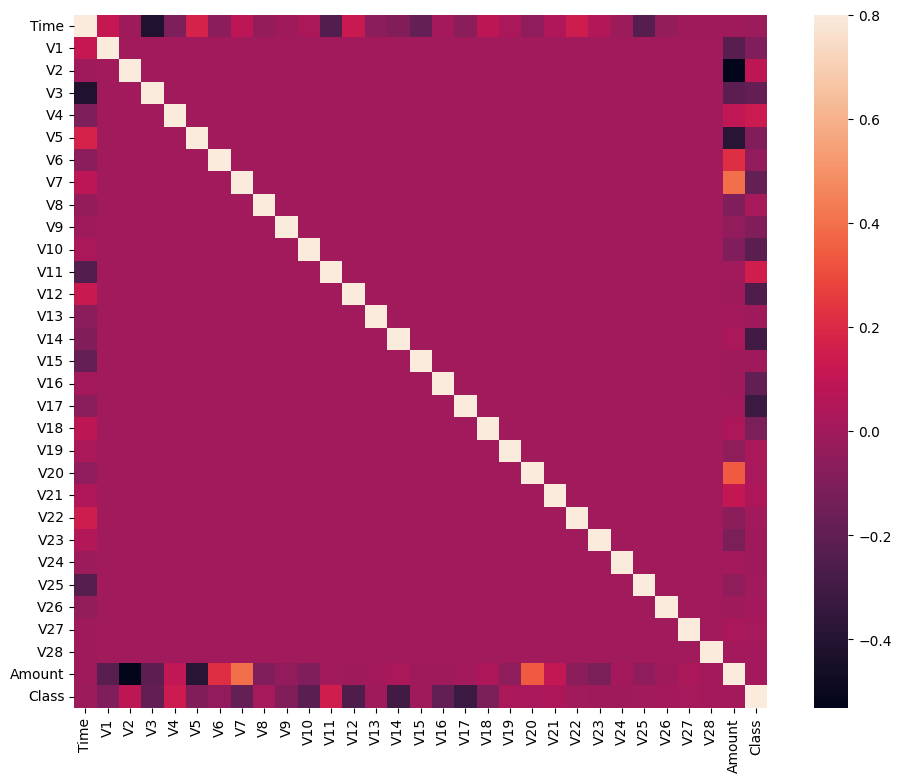

In [16]:
#Correlation matrix
corrmat = credit_df.corr()
fig = plt.figure(figsize= (12, 9))
sns.heatmap(corrmat, vmax= 0.8, square=True)
plt.show()

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the Data available to us.

Code : Separating the X and the Y values
Dividing the data into inputs parameters and outputs value format

In [18]:
#dividing the input(x) and output(y) from the dataset
x = credit_df.drop('Class', axis=1).values
x

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [19]:
#Output
y = credit_df.Class.values
y
#putting values for the sake of processing --Its a numpy array with no columns


array([0, 0, 0, ..., 0, 0, 0])

### Training and Testing Data Bifurcation
We will be dividing the dataset into two main groups. 

One for training the model and the other for Testing our trained model’s performance.

In [20]:
#Using scikit learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

#split the data into training and testing sets
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)


### Building Models

#### 1. Building a KNeighbors Classifier model using scikit learn


In [21]:
from sklearn.neighbors import KNeighborsClassifier
kn_model = KNeighborsClassifier(n_neighbors=9)
kn_model.fit(x_train, y_train)
#Predictions
y_pred = kn_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
#Building all kinds of evaluating parameters

#Evaluating the classifier
#Printing the every score of the classifier
# score in everything

from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (y_pred != y_test).sum()
print('the model used is KNN classifier')

kn_acc = accuracy_score(y_test, y_pred)
print(f'The accuracy score is {kn_acc}')

knn_preci = precision_score(y_test,y_pred)
print(f'The precision score is {knn_preci}')

knn_rec = recall_score(y_test,y_pred)
print(f'The recall score is {kn_acc}')

knn_f1 = f1_score(y_test,y_pred)
print(f'the F1 score is {knn_f1}')

knn_mcc = matthews_corrcoef(y_test,y_pred)
print(f'The Mathews correlation is {knn_mcc}')



the model used is KNN classifier
The accuracy score is 0.9983146659176293
The precision score is 1.0
The recall score is 0.9983146659176293
the F1 score is 0.039999999999999994
The Mathews correlation is 0.14273670685749304


<function matplotlib.pyplot.show(close=None, block=None)>

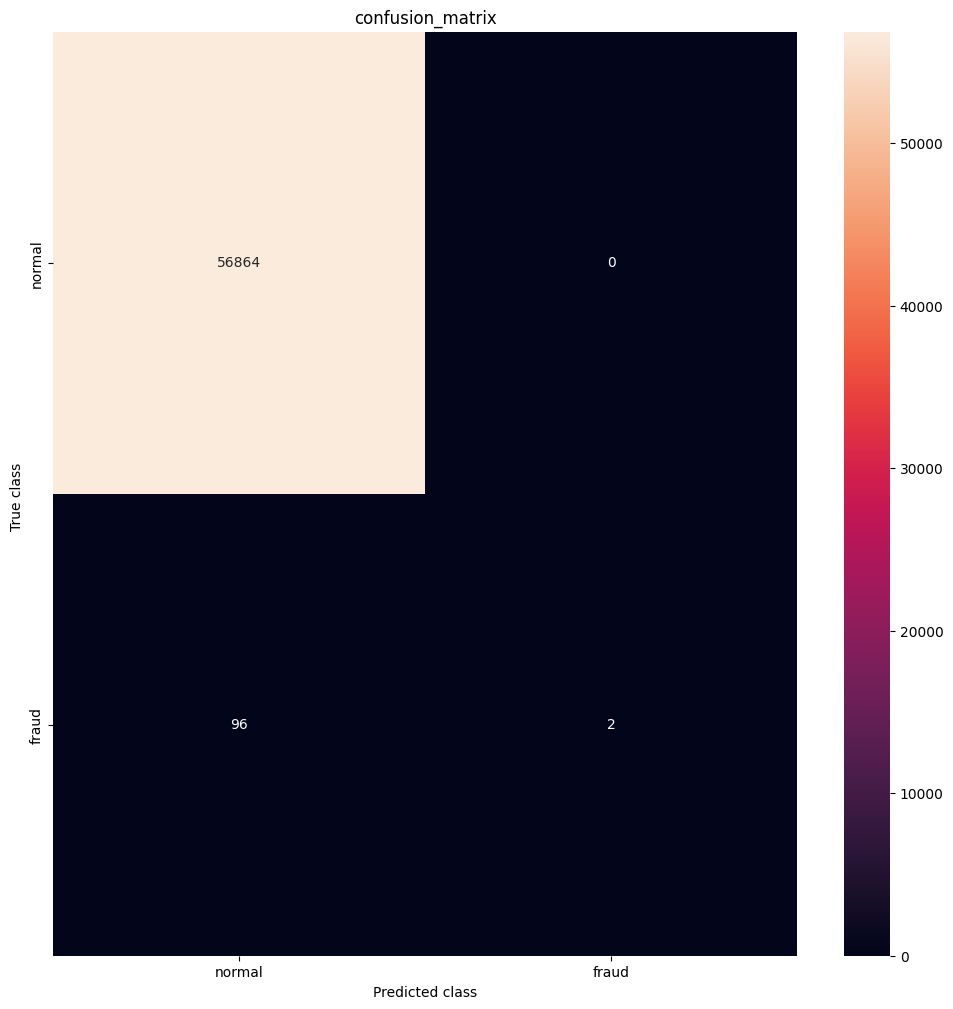

In [23]:
#Visualizing the confusion matrix

LABELS = ['normal', 'fraud']
conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels= LABELS, yticklabels= LABELS, annot = True, fmt = 'd');
plt.title('confusion_matrix')
plt.ylabel('True class ')
plt.xlabel('Predicted class')
plt.show

#### 2. Building an SVM model 

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

svc_model = SVC()
svc_model.fit(x_train,y_train)
y_pred = svc_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
svc_result = confusion_matrix(y_test,y_pred)
svc_result

array([[56864,     0],
       [   98,     0]])

In [26]:
svc_report = classification_report(y_test,y_pred)
print(svc_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



/home/mush/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mush/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mush/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
svc_acc = accuracy_score(y_test,y_pred)
svc_acc

0.9982795547909132

#### 3. Building a random forest model using scikit learn


In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [28]:
rf_acc = accuracy_score(y_test,y_pred)
rf_acc

0.9982795547909132

In [30]:
df = pd.DataFrame({'model':['randomforest', 'svm model', 'knn model'], 'Accuracy' : [rf_acc, svc_acc, kn_acc]})
df

,model,Accuracy
0,randomforest,0.998280
1,svm model,0.998280
2,knn model,0.998315
